In [1]:
import pandas as pd

In [2]:
taj_west_df = pd.read_excel('./Taj_West_Bengaluru.xlsx')
leela_palace_df = pd.read_excel('./The_Leela_Palace_Bengaluru.xlsx')
grand_mercure_df = pd.read_excel('./Grand_Mercure_Bengaluru.xlsx')

In [3]:
taj_west_df.head()

Title  Rating  \
0  Taj West End, restaurant experience      50   
1  My Parents 50th Wedding Anniversary      50   
2              Every Visit is Awesome       50   
3                    Totally worth it!      50   
4         Exceptional service and food      50   

                                              Review  
0  Very courteous treatment by Mohan and venkates...  
1  A wonderful spread, excellent ambience and out...  
2  I enjoyed each and every stay of mine, the loc...  
3  Thanks to Giri and Mohan for serving us delici...  
4  Exceptional service and food. Naveen served us...

In [4]:
leela_palace_df.head()

Title  Rating  \
0  New year at Leela Bengaluru new Year at Leela ...      50   
1                                            5 Stars      50   
2       Excellent brunch on the last day of the year      50   
3                    Wonder time at Leela Bangalore       50   
4           When life gives you lemons,go to Citrus.      50   

                                              Review  
0  Loved the new year celebration @Leela Palace, ...  
1  Lovely service on New Year’s Eve. Absolutely w...  
2  Came for brunch on December 31st with family. ...  
3  We really had a good time having our brunch on...  
4  We had a lovely time celebrating our Anniversa...

In [5]:
grand_mercure_df.head()

Title  Rating  \
0                                         Excellent      50   
1                             Priyanka and Aaryaman      50   
2                         Amazing place and service      50   
3  Great hotel, amazing food and even amazing staff      50   
4                 Great experience at grand Mercure      50   

                                              Review  
0  Very spacious rooms and wonderful service.  Pa...  
1  Came on a business trip for 4 nights. It was a...  
2  I was 2 weeks in this amazing hotel for a busi...  
3  Stayed at gopalan mall, pretty great. Food is ...  
4  It was a great stay at grand Mercure gopalan m...

Text Preparation Step-
1. Data Treatment of the reviews- Tokenisation,remove stop words and convert all letter to small case

2. Geneartion Tf-DIF matrix for EDA


In [7]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [6]:
taj_west_df['Title']= taj_west_df['Title'].str.lower()
taj_west_df['Review']= taj_west_df['Review'].str.lower()
leela_palace_df['Title']= leela_palace_df['Title'].str.lower()
leela_palace_df['Review']= leela_palace_df['Review'].str.lower()
grand_mercure_df['Title']= grand_mercure_df['Title'].str.lower()
grand_mercure_df['Review']= grand_mercure_df['Review'].str.lower()

In [8]:
stop_words = set(stopwords.words('english')) 

def remove_stop_words(sentence): 
  words = sentence.split() 
  words = [word for word in words if word.isalpha()]
  filtered_words = [word for word in words if word not in stop_words]  
  return ' '.join(filtered_words)

In [9]:
taj_west_df['Cleaned_Title'] = taj_west_df['Title'].apply(lambda x: remove_stop_words(x))
taj_west_df['Cleaned_Review'] = taj_west_df['Review'].apply(lambda x: remove_stop_words(x))
leela_palace_df['Cleaned_Title'] = leela_palace_df['Title'].apply(lambda x: remove_stop_words(x))
leela_palace_df['Cleaned_Review'] = leela_palace_df['Review'].apply(lambda x: remove_stop_words(x))
grand_mercure_df['Cleaned_Title'] = grand_mercure_df['Title'].apply(lambda x: remove_stop_words(x))
grand_mercure_df['Cleaned_Review'] = grand_mercure_df['Review'].apply(lambda x: remove_stop_words(x))

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer 
def apply_lemmatization(sentence):
    words = sentence.split() 
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [11]:
taj_west_df['Cleaned_Title'] = taj_west_df['Cleaned_Title'].apply(lambda x: apply_lemmatization(x))
taj_west_df['Cleaned_Review'] = taj_west_df['Cleaned_Review'].apply(lambda x: apply_lemmatization(x))
print(taj_west_df['Cleaned_Review'])

0      courteous treatment mohan thank place fantasti...
1      wonderful excellent ambience outstanding hospi...
2      enjoyed every stay location property ambiance ...
3      thanks giri mohan serving u delicious breakfas...
4      exceptional service naveen served u definitely...
                             ...                        
225    excellent service excellent service staff frie...
226    great impressed mohan food good staff fresh fo...
227    came taj west end enjoyed food ambience great ...
228    lovely time staff super friendly special thank...
229    sitting charming surrounded enjoying fine buff...
Name: Cleaned_Review, Length: 230, dtype: object


In [12]:
import re
def remove_common_words(sentence, patterns):
    for pattern in patterns:
        sentence = re.sub(pattern, '', sentence, flags=re.IGNORECASE)
    return sentence

In [13]:
common_patterns = [r'\\b(?:' + '|'.join(['taj', 'taj west']) + ')\\b']
taj_west_df['Cleaned_Review'] =   taj_west_df['Cleaned_Review'].apply(lambda x: remove_common_words(x,common_patterns))



In [14]:
common_patterns = [r'\\b(?:' + '|'.join(['leela', 'leela palace']) + ')\\b']
leela_palace_df['Cleaned_Review'] =  leela_palace_df['Cleaned_Review'].apply(lambda x: remove_common_words(x,common_patterns))



In [15]:
common_patterns = [r'\\b(?:' + '|'.join(['mercure', 'grand mercure']) + ')\\b']
grand_mercure_df['Cleaned_Review'] =   grand_mercure_df['Cleaned_Review'].apply(lambda x: remove_common_words(x,common_patterns))



In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,3), max_features=20)
taj_west_X = vectorizer.fit_transform(taj_west_df['Cleaned_Review'])
pd.DataFrame(taj_west_X.toarray(), columns=vectorizer.get_feature_names_out())

amazing       end  excellent  experience      food      good     great  \
0        0.0  0.000000   0.000000    0.000000  0.490714  0.000000  0.000000   
1        0.0  0.380149   0.373414    0.000000  0.299000  0.000000  0.000000   
2        0.0  0.000000   0.000000    0.000000  0.000000  0.000000  0.000000   
3        0.0  0.000000   0.000000    0.000000  0.000000  0.000000  0.000000   
4        0.0  0.000000   0.000000    0.000000  0.000000  0.000000  0.000000   
..       ...       ...        ...         ...       ...       ...       ...   
225      0.0  0.000000   0.559181    0.000000  0.000000  0.282081  0.499705   
226      0.0  0.000000   0.000000    0.000000  0.533284  0.671938  0.297583   
227      0.0  0.403904   0.000000    0.000000  0.317684  0.000000  0.354549   
228      0.0  0.000000   0.000000    0.000000  0.000000  0.000000  0.423841   
229      0.0  0.000000   0.000000    0.470575  0.366751  0.000000  0.000000   

        like      made     mohan  room   service   special     staff  \
0    0.00000  0.000000  0.602299   0.0  0.000000  0.000000  0.000000   
1    0.00000  0.383645  0.000000   0.0  0.000000  0.000000  0.000000   
2    0.00000  0.609237  0.000000   0.0  0.000000  0.000000  0.000000   
3    0.00000  0.000000  0.381559   0.0  0.000000  0.372091  0.000000   
4    0.00000  0.000000  0.000000   0.0  1.000000  0.000000  0.000000   
..       ...       ...       ...   ...       ...       ...       ...   
225  0.00000  0.000000  0.000000   0.0  0.406262  0.000000  0.439309   
226  0.00000  0.000000  0.327275   0.0  0.000000  0.000000  0.261616   
227  0.00000  0.000000  0.389924   0.0  0.288249  0.000000  0.000000   
228  0.00000  0.000000  0.000000   0.0  0.000000  0.454564  0.372614   
229  0.47949  0.000000  0.000000   0.0  0.000000  0.438978  0.000000   

         stay       taj  taj west     thank    thanks      west  
0    0.000000  0.000000  0.000000  0.629631  0.000000  0.000000  
1    0.000000  0.271296  0.366991  0.383645  0.000000  0.352132  
2    0.507603  0.000000  0.000000  0.000000  0.609237  0.000000  
3    0.000000  0.282065  0.000000  0.000000  0.797747  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...  
225  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
226  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
227  0.000000  0.288249  0.389924  0.000000  0.000000  0.374136  
228  0.000000  0.000000  0.000000  0.487283  0.487283  0.000000  
229  0.000000  0.000000  0.000000  0.470575  0.000000  0.000000  

[230 rows x 20 columns]

In [18]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,3), max_features=20)
leela_palace_X = vectorizer.fit_transform(leela_palace_df['Cleaned_Review'])
pd.DataFrame(leela_palace_X.toarray(), columns=vectorizer.get_feature_names_out())

amazing  ambience      best  excellent  experience      food      good  \
0    0.000000       0.0  0.000000   0.000000    0.000000  0.000000  0.000000   
1    0.487026       0.0  0.000000   0.000000    0.000000  0.000000  0.000000   
2    0.000000       0.0  0.000000   0.000000    0.000000  0.000000  0.000000   
3    0.362630       0.0  0.000000   0.000000    0.000000  0.226459  0.293751   
4    0.000000       0.0  0.000000   0.000000    0.000000  0.000000  0.000000   
..        ...       ...       ...        ...         ...       ...       ...   
378  0.000000       0.0  0.000000   0.411383    0.760176  0.258369  0.000000   
379  0.000000       0.0  0.000000   0.000000    0.571077  0.000000  0.000000   
380  0.655678       0.0  0.000000   0.000000    0.000000  0.000000  0.000000   
381  0.000000       0.0  0.785968   0.000000    0.000000  0.000000  0.618267   
382  0.000000       0.0  0.000000   0.000000    0.000000  0.816205  0.000000   

        great     leela      made  place    really   service   special  \
0    0.000000  0.000000  0.000000    0.0  0.000000  0.250156  0.000000   
1    0.000000  0.000000  0.484266    0.0  0.468574  0.338116  0.000000   
2    0.499674  0.000000  0.000000    0.0  0.000000  0.000000  0.642148   
3    0.000000  0.000000  0.000000    0.0  0.348891  0.000000  0.000000   
4    0.000000  1.000000  0.000000    0.0  0.000000  0.000000  0.000000   
..        ...       ...       ...    ...       ...       ...       ...   
378  0.321933  0.000000  0.000000    0.0  0.000000  0.287229  0.000000   
379  0.000000  0.527668  0.000000    0.0  0.000000  0.000000  0.000000   
380  0.510202  0.556579  0.000000    0.0  0.000000  0.000000  0.000000   
381  0.000000  0.000000  0.000000    0.0  0.000000  0.000000  0.000000   
382  0.000000  0.000000  0.000000    0.0  0.000000  0.000000  0.000000   

        staff     thank        us  visit  wonderful  would  
0    0.000000  0.729024  0.637139    0.0   0.000000    0.0  
1    0.440917  0.000000  0.000000    0.0   0.000000    0.0  
2    0.581353  0.000000  0.000000    0.0   0.000000    0.0  
3    0.000000  0.000000  0.000000    0.0   0.780514    0.0  
4    0.000000  0.000000  0.000000    0.0   0.000000    0.0  
..        ...       ...       ...    ...        ...    ...  
378  0.000000  0.000000  0.000000    0.0   0.000000    0.0  
379  0.000000  0.628838  0.000000    0.0   0.000000    0.0  
380  0.000000  0.000000  0.000000    0.0   0.000000    0.0  
381  0.000000  0.000000  0.000000    0.0   0.000000    0.0  
382  0.000000  0.000000  0.577763    0.0   0.000000    0.0  

[383 rows x 20 columns]

In [19]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,3), max_features=20)
grand_mercure_X = vectorizer.fit_transform(grand_mercure_df['Cleaned_Review'])
pd.DataFrame(grand_mercure_X.toarray(), columns=vectorizer.get_feature_names_out())

also  experience      food     front      good     grand  \
0    0.000000    0.000000  0.000000  0.000000  0.355531  0.000000   
1    0.000000    0.544107  0.000000  0.000000  0.000000  0.000000   
2    0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.493405    0.000000  0.360214  0.000000  0.000000  0.000000   
4    0.000000    0.000000  0.000000  0.295341  0.000000  0.271052   
..        ...         ...       ...       ...       ...       ...   
349  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
350  0.398609    0.000000  0.000000  0.389348  0.000000  0.357327   
351  0.000000    0.430681  0.000000  0.420675  0.000000  0.386077   
352  0.000000    0.388091  0.283328  0.000000  0.297196  0.347898   
353  0.278718    0.000000  0.610439  0.000000  0.000000  0.000000   

     grand mercure     great   helpful     hotel   mercure      nice  \
0         0.000000  0.000000  0.472841  0.000000  0.000000  0.000000   
1         0.000000  0.000000  0.000000  0.395693  0.000000  0.568407   
2         0.000000  0.345613  0.000000  0.667147  0.000000  0.000000   
3         0.000000  0.371771  0.000000  0.358821  0.000000  0.000000   
4         0.295341  0.227827  0.307950  0.000000  0.290355  0.000000   
..             ...       ...       ...       ...       ...       ...   
349       0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
350       0.389348  0.000000  0.000000  0.000000  0.382774  0.000000   
351       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
352       0.000000  0.584837  0.000000  0.000000  0.000000  0.000000   
353       0.000000  0.000000  0.000000  0.202693  0.000000  0.000000   

       really      room   service     staff      stay      team    thanks  \
0    0.000000  0.000000  0.367582  0.332488  0.635889  0.000000  0.000000   
1    0.473591  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.377673  0.363165  0.000000  0.000000  0.000000  0.401174   
3    0.000000  0.000000  0.000000  0.353355  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.216541  0.621210  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
349  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
350  0.000000  0.328205  0.000000  0.285466  0.272980  0.000000  0.000000   
351  0.374864  0.000000  0.000000  0.000000  0.589887  0.000000  0.000000   
352  0.000000  0.000000  0.000000  0.000000  0.265777  0.383510  0.000000   
353  0.000000  0.000000  0.000000  0.000000  0.381749  0.550855  0.243769   

        visit  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.484739  
4    0.297056  
..        ...  
349  0.000000  
350  0.000000  
351  0.000000  
352  0.000000  
353  0.000000  

[354 rows x 20 columns]

Exploratory Data Analysis
Using Bigram

In [20]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parshvisrivastava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
def generate_bigrams(text):
    words = word_tokenize(text)
    bigrams = list(ngrams(words, 2))
    return bigrams


In [22]:
taj_west_df['Bigrams'] = taj_west_df['Cleaned_Review'].apply(generate_bigrams)
leela_palace_df['Bigrams'] = leela_palace_df['Cleaned_Review'].apply(generate_bigrams)
grand_mercure_df['Bigrams'] = grand_mercure_df['Cleaned_Review'].apply(generate_bigrams)

In [23]:
taj_west_all_bigrams = [bigram for bigrams_list in taj_west_df['Bigrams'] for bigram in bigrams_list]
taj_west_bigram_freq = nltk.FreqDist(taj_west_all_bigrams)
taj_west_top_50_bigrams = dict(sorted(taj_west_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:50])

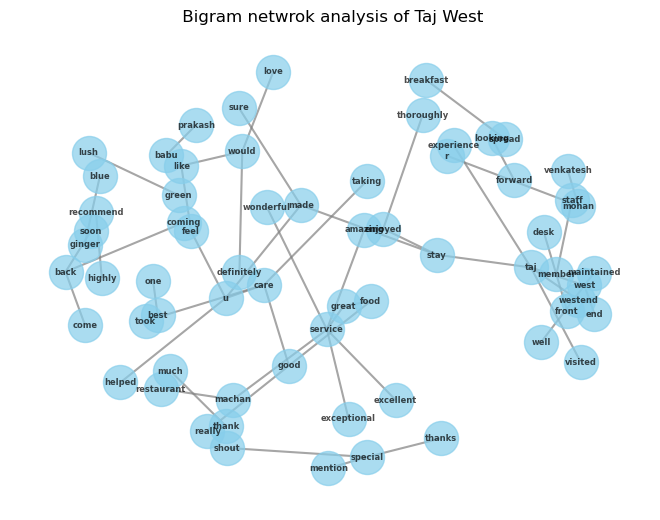

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()


for bigram, freq in taj_west_top_50_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, font_size=6, node_color='skyblue', font_color='black', node_size=600, font_weight='bold', edge_color='gray', width=1.5, alpha=0.7)
plt.title(" Bigram netwrok analysis of Taj West")
plt.show()


In [25]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 1), max_features=20)
X = vectorizer.fit_transform(taj_west_df['Cleaned_Review'])

word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

taj_west_word_freq = word_df.sum()

taj_west_word_freq = taj_west_word_freq.sort_values(ascending=False)

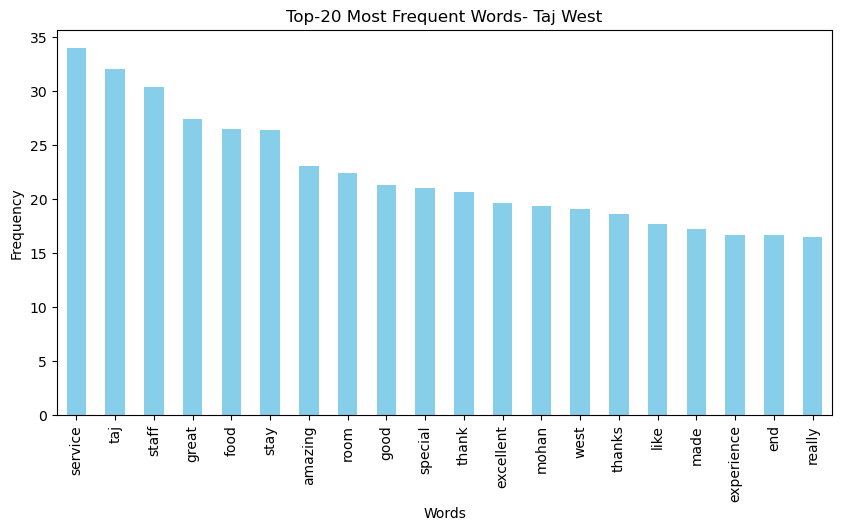

In [26]:
plt.figure(figsize=(10, 5))
taj_west_word_freq.plot(kind='bar', color='skyblue')
plt.title('Top-20 Most Frequent Words- Taj West')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [27]:
leela_palace_all_bigrams = [bigram for bigrams_list in leela_palace_df['Bigrams'] for bigram in bigrams_list]
leela_palace_bigram_freq = nltk.FreqDist(leela_palace_all_bigrams)
leela_palace_top_50_bigrams = dict(sorted(leela_palace_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:50])

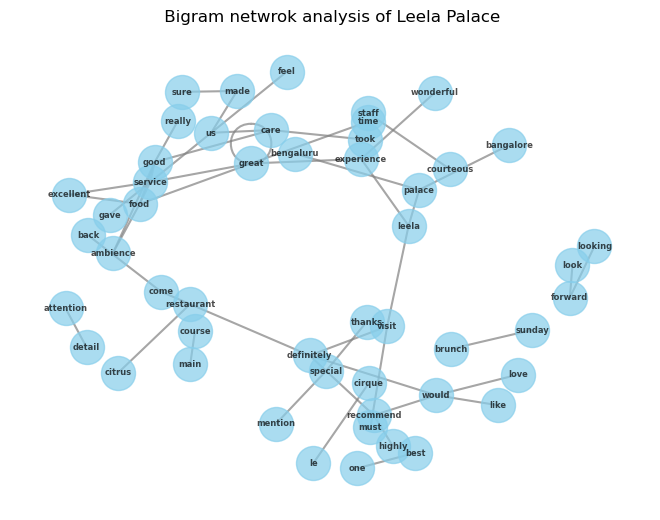

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()


for bigram, freq in leela_palace_top_50_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, font_size=6, node_color='skyblue', font_color='black', node_size=600, font_weight='bold', edge_color='gray', width=1.5, alpha=0.7)
plt.title(" Bigram netwrok analysis of Leela Palace")
plt.show()


In [29]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 1), max_features=20)
X = vectorizer.fit_transform(leela_palace_df['Cleaned_Review'])

word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

leela_palace_word_freq = word_df.sum()

leela_palace_word_freq = leela_palace_word_freq.sort_values(ascending=False)

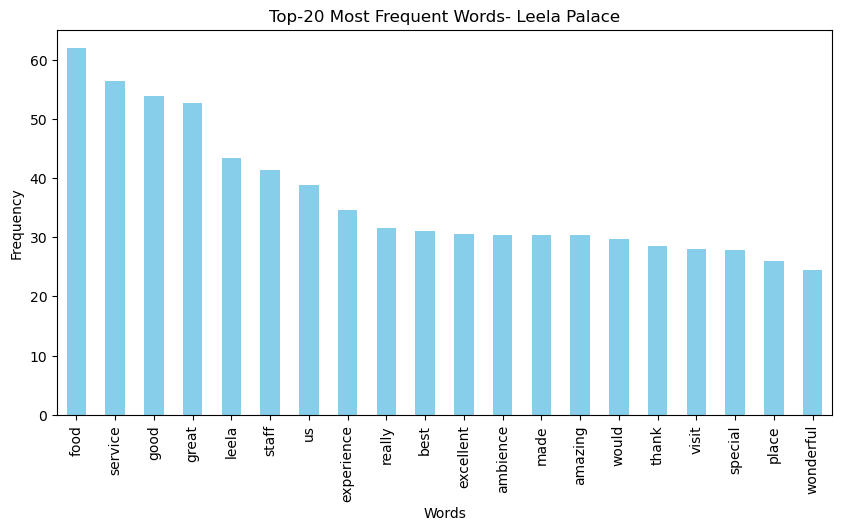

In [30]:
plt.figure(figsize=(10, 5))
leela_palace_word_freq.plot(kind='bar', color='skyblue')
plt.title('Top-20 Most Frequent Words- Leela Palace')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [31]:
grand_mercure_all_bigrams = [bigram for bigrams_list in grand_mercure_df['Bigrams'] for bigram in bigrams_list]
grand_mercure_bigram_freq = nltk.FreqDist(grand_mercure_all_bigrams)
grand_mercure_top_50_bigrams = dict(sorted(grand_mercure_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:50])

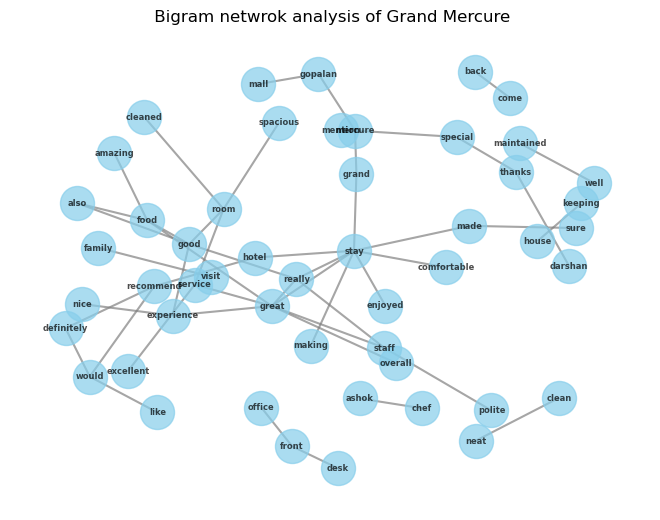

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()


for bigram, freq in grand_mercure_top_50_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)

pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, font_size=6, node_color='skyblue', font_color='black', node_size=600, font_weight='bold', edge_color='gray', width=1.5, alpha=0.7)
plt.title(" Bigram netwrok analysis of Grand Mercure")
plt.show()


In [34]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 1), max_features=20)
X = vectorizer.fit_transform(grand_mercure_df['Cleaned_Review'])

word_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

grand_mercure_word_freq = word_df.sum()

grand_mercure_word_freq = grand_mercure_word_freq.sort_values(ascending=False)

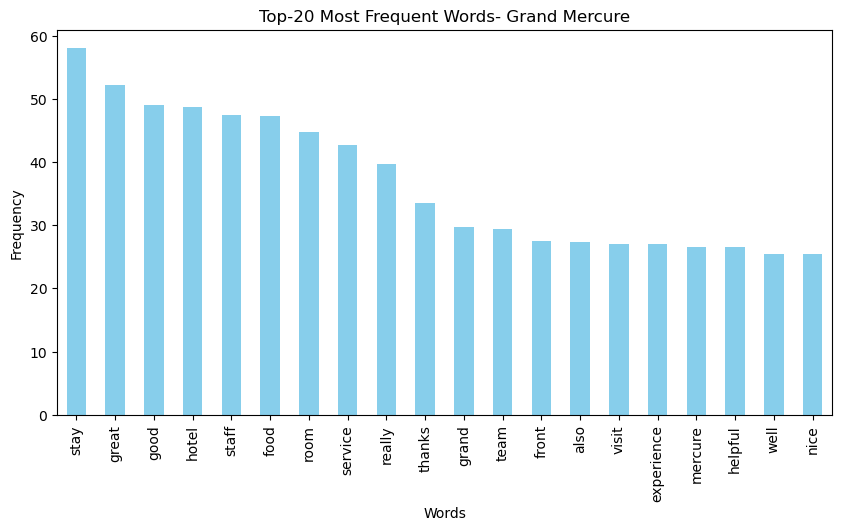

In [35]:
plt.figure(figsize=(10, 5))
grand_mercure_word_freq.plot(kind='bar', color='skyblue')
plt.title('Top-20 Most Frequent Words- Grand Mercure')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

Text Embedding 

In [ ]:
!pip install --quiet transformers

In [36]:
taj_west_df["Cleaned_Review"]

0      courteous treatment mohan thank place fantasti...
1      wonderful excellent ambience outstanding hospi...
2      enjoyed every stay location property ambiance ...
3      thanks giri mohan serving u delicious breakfas...
4      exceptional service naveen served u definitely...
                             ...                        
225    excellent service excellent service staff frie...
226    great impressed mohan food good staff fresh fo...
227    came taj west end enjoyed food ambience great ...
228    lovely time staff super friendly special thank...
229    sitting charming surrounded enjoying fine buff...
Name: Cleaned_Review, Length: 230, dtype: object

In [37]:
from transformers import BertTokenizer
from transformers import AutoModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased" )


In [38]:
taj_west_inputs = tokenizer(taj_west_df['Cleaned_Review'].tolist(), truncation=True, padding=True, max_length=15, return_tensors="pt")
taj_west_outputs = model(**taj_west_inputs)
taj_west_embedding = taj_west_outputs['pooler_output'].detach().numpy()
print(taj_west_embedding[0][0:10])
print(taj_west_embedding.shape)


[-0.80607283 -0.2851626  -0.27841106  0.6273231   0.298113    0.04610442
  0.8399819   0.1567512  -0.16870885 -0.999904  ]
(230, 768)


In [39]:
leela_palace_inputs = tokenizer(leela_palace_df['Cleaned_Review'].tolist(), truncation=True, padding=True, max_length=15, return_tensors="pt")
leela_palace_outputs = model(**leela_palace_inputs)
leela_palace_embedding = leela_palace_outputs['pooler_output'].detach().numpy()
print(leela_palace_embedding[0][0:10])
print(leela_palace_embedding.shape)

[-0.8552495  -0.5807184  -0.98368895  0.83061004  0.8355471  -0.18229437
  0.9419127   0.43514106 -0.9188133  -0.99999297]
(383, 768)


In [40]:
grand_mercure_inputs = tokenizer(grand_mercure_df['Cleaned_Review'].tolist(), truncation=True, padding=True, max_length=15, return_tensors="pt")
grand_mercure_outputs = model(**grand_mercure_inputs)
grand_mercure_embedding = grand_mercure_outputs['pooler_output'].detach().numpy()
print(grand_mercure_embedding[0][0:10])
print(grand_mercure_embedding.shape)

[-0.76374936 -0.25651878 -0.32342252  0.5882896   0.4227482  -0.05106178
  0.8348589   0.20119044 -0.07491519 -0.99989116]
(354, 768)


PCA

In [41]:
grand_mercure_word_freq.index.tolist()

['stay',
 'great',
 'good',
 'hotel',
 'staff',
 'food',
 'room',
 'service',
 'really',
 'thanks',
 'grand',
 'team',
 'front',
 'also',
 'visit',
 'experience',
 'mercure',
 'helpful',
 'well',
 'nice']

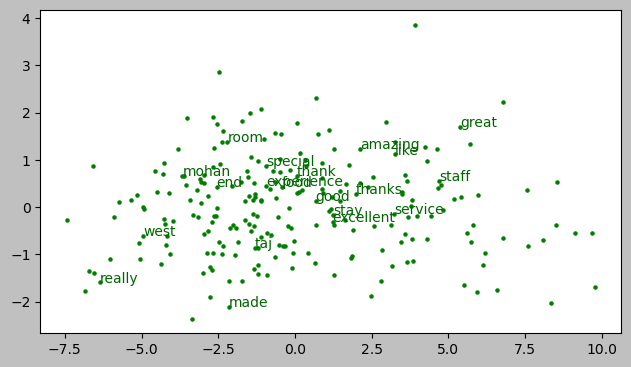

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
wordsToPlot=taj_west_word_freq.index.tolist()
pca = PCA(n_components=3)
result = pca.fit_transform(taj_west_embedding)

plt.figure(figsize=(7.5,4.2), facecolor='silver')
plt.scatter(result[:, 0], result[:, 1], s=5, color='green')
for i, word in enumerate(wordsToPlot):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]), color='darkgreen')

plt.show()

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [44]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(taj_west_embedding)
cluster_assignment = clustering_model.labels_

/Users/parshvisrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
taj_west_df["cluster"] = cluster_assignment
taj_west_df.head()

Title  Rating  \
0  taj west end, restaurant experience      50   
1  my parents 50th wedding anniversary      50   
2              every visit is awesome       50   
3                    totally worth it!      50   
4         exceptional service and food      50   

                                              Review  \
0  very courteous treatment by mohan and venkates...   
1  a wonderful spread, excellent ambience and out...   
2  i enjoyed each and every stay of mine, the loc...   
3  thanks to giri and mohan for serving us delici...   
4  exceptional service and food. naveen served us...   

                    Cleaned_Title  \
0  taj west restaurant experience   
1      parent wedding anniversary   
2             every visit awesome   
3                   totally worth   
4        exceptional service food   

                                      Cleaned_Review  \
0  courteous treatment mohan thank place fantasti...   
1  wonderful excellent ambience outstanding hospi...   
2  enjoyed every stay location property ambiance ...   
3  thanks giri mohan serving u delicious breakfas...   
4  exceptional service naveen served u definitely...   

                                             Bigrams  cluster  
0  [(courteous, treatment), (treatment, mohan), (...        0  
1  [(wonderful, excellent), (excellent, ambience)...        1  
2  [(enjoyed, every), (every, stay), (stay, locat...        0  
3  [(thanks, giri), (giri, mohan), (mohan, servin...        0  
4  [(exceptional, service), (service, naveen), (n...        1

In [46]:
taj_west_clustered_sentences =[[] for i in range (num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    taj_west_clustered_sentences[cluster_id].append(taj_west_df['Cleaned_Review'][sentence_id])

In [47]:
def word_cloud(pred_list):
    wc = ' '.join([str(text) for text in pred_list])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(wc)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

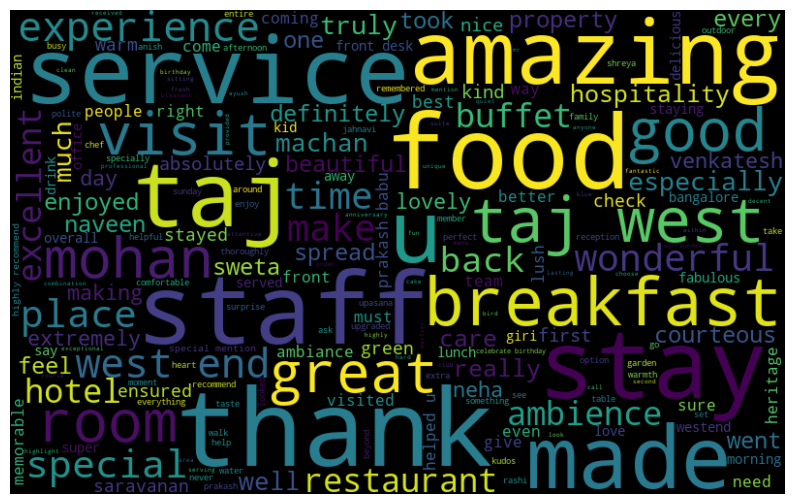

In [48]:
word_cloud(taj_west_clustered_sentences[0])

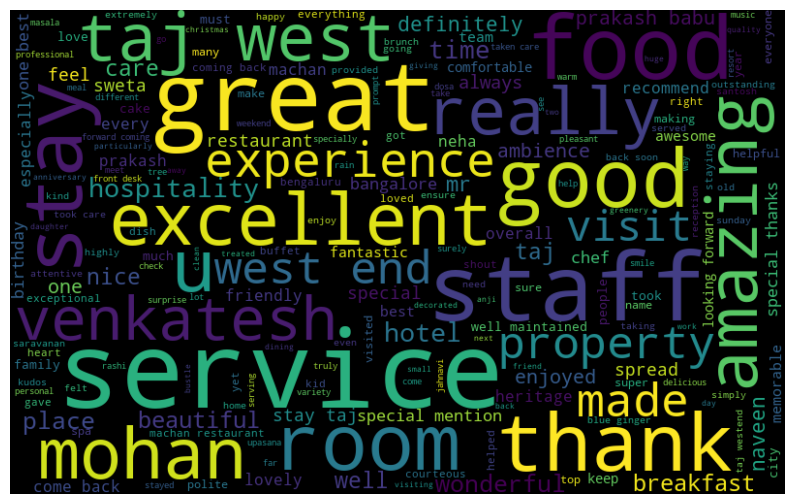

In [49]:
word_cloud(taj_west_clustered_sentences[1])

In [50]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(leela_palace_embedding)
cluster_assignment = clustering_model.labels_

/Users/parshvisrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
leela_palace_df["cluster"] = cluster_assignment
leela_palace_df.head()

Title  Rating  \
0  new year at leela bengaluru new year at leela ...      50   
1                                            5 stars      50   
2       excellent brunch on the last day of the year      50   
3                    wonder time at leela bangalore       50   
4           when life gives you lemons,go to citrus.      50   

                                              Review  \
0  loved the new year celebration @leela palace, ...   
1  lovely service on new year’s eve. absolutely w...   
2  came for brunch on december 31st with family. ...   
3  we really had a good time having our brunch on...   
4  we had a lovely time celebrating our anniversa...   

                                    Cleaned_Title  \
0  new year leela bengaluru new year leela palace   
1                                           stars   
2                  excellent brunch last day year   
3                     wonder time leela bangalore   
4                                      life gives   

                                      Cleaned_Review  \
0  loved new year celebration aiyappa kadam atten...   
1  lovely service new absolutely worth ayyappa ka...   
2  came brunch december well laid staff special m...   
3  really good time brunch new year wonderful liv...   
4  lovely time celebrating anniversary leela alwa...   

                                             Bigrams  cluster  
0  [(loved, new), (new, year), (year, celebration...        1  
1  [(lovely, service), (service, new), (new, abso...        1  
2  [(came, brunch), (brunch, december), (december...        0  
3  [(really, good), (good, time), (time, brunch),...        1  
4  [(lovely, time), (time, celebrating), (celebra...        1

In [52]:
leela_palace_clustered_sentences =[[] for i in range (num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    leela_palace_clustered_sentences[cluster_id].append(leela_palace_df['Cleaned_Review'][sentence_id])

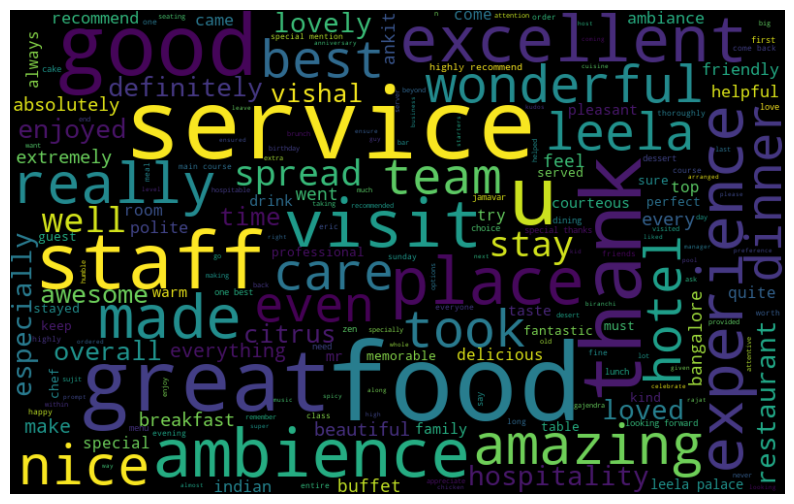

In [53]:
word_cloud(leela_palace_clustered_sentences[0])

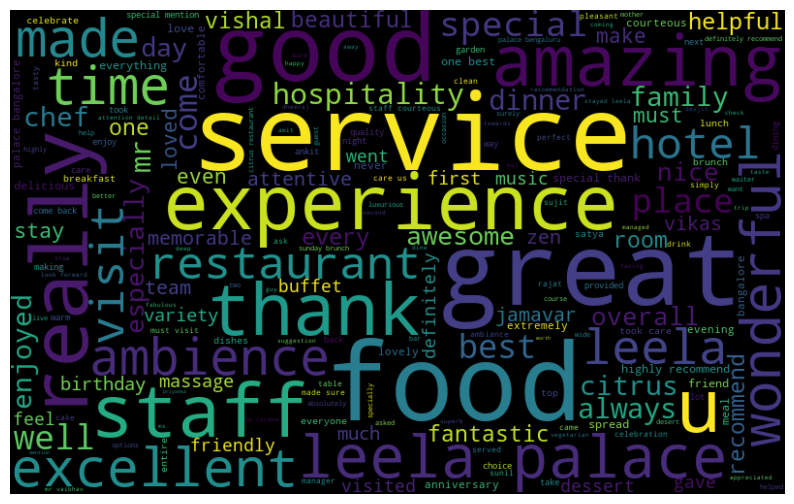

In [54]:
word_cloud(leela_palace_clustered_sentences[1])

In [55]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(grand_mercure_embedding)
cluster_assignment = clustering_model.labels_

/Users/parshvisrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
grand_mercure_df["cluster"] = cluster_assignment
grand_mercure_df.head()

Title  Rating  \
0                                         excellent      50   
1                             priyanka and aaryaman      50   
2                         amazing place and service      50   
3  great hotel, amazing food and even amazing staff      50   
4                 great experience at grand mercure      50   

                                              Review  \
0  very spacious rooms and wonderful service.  pa...   
1  came on a business trip for 4 nights. it was a...   
2  i was 2 weeks in this amazing hotel for a busi...   
3  stayed at gopalan mall, pretty great. food is ...   
4  it was a great stay at grand mercure gopalan m...   

                           Cleaned_Title  \
0                              excellent   
1                      priyanka aaryaman   
2                  amazing place service   
3  great amazing food even amazing staff   
4         great experience grand mercure   

                                      Cleaned_Review  \
0  spacious rooms wonderful parmesh oci desk help...   
1  came business trip nice experience plan come b...   
2  weeks amazing hotel business location hotel gr...   
3  stayed gopalan pretty food amazing lots wester...   
4  great stay grand mercure gopalan mall first st...   

                                             Bigrams  cluster  
0  [(spacious, rooms), (rooms, wonderful), (wonde...        1  
1  [(came, business), (business, trip), (trip, ni...        1  
2  [(weeks, amazing), (amazing, hotel), (hotel, b...        1  
3  [(stayed, gopalan), (gopalan, pretty), (pretty...        1  
4  [(great, stay), (stay, grand), (grand, mercure...        0

In [57]:
grand_mercure_clustered_sentences =[[] for i in range (num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    grand_mercure_clustered_sentences[cluster_id].append(grand_mercure_df['Cleaned_Review'][sentence_id])

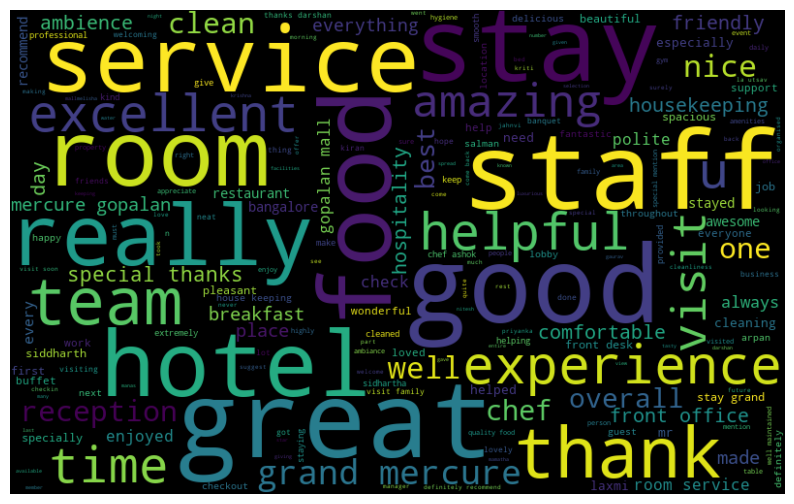

In [58]:
word_cloud(grand_mercure_clustered_sentences[0])

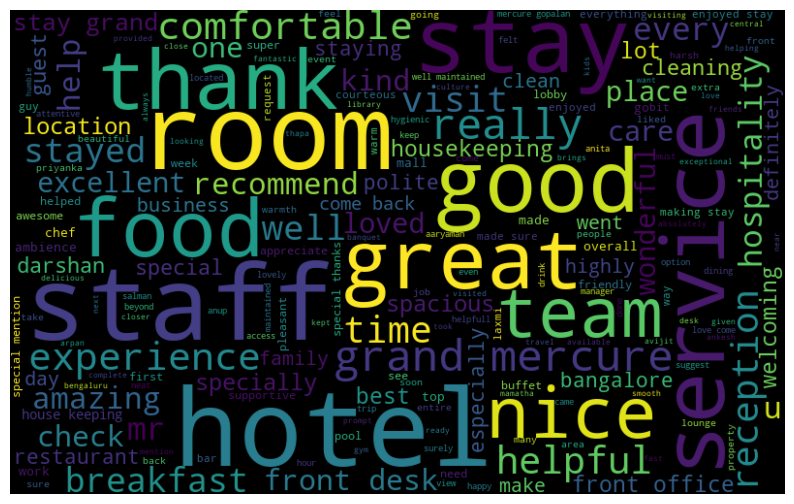

In [59]:
word_cloud(grand_mercure_clustered_sentences[1])

Sentiment Analysis 

In [60]:
from transformers import pipeline

In [61]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Adding sentiment to cluster

In [63]:
def add_sentiment(cluster_list, sentiment_list):
    
    row_list=[]
    for index,sentence in  enumerate(cluster_list):
        dic1 ={"sentence":sentence,"sentiment": sentiment_list[index]["label"]}
        row_list.append(dic1)
    cluster_sentiment_df = pd.DataFrame(row_list)
    return cluster_sentiment_df

In [64]:
sentiment =sentiment_pipeline(taj_west_clustered_sentences[0])

In [65]:
tw__sentiment_clu1_df =add_sentiment(taj_west_clustered_sentences[0],sentiment)

In [130]:
display(tw__sentiment_clu1_df[tw__sentiment_clu1_df["sentiment"]== "NEGATIVE"].to_string())

'                                                                                                                                                                                                                                                                                                                                                                                         sentence sentiment  emotion\n29                                                                                                                                                                                                                                                                   night stay chosen better place large spotlessly clean staff helpful friendly went way make stay food plentiful pleasure stay  NEGATIVE      joy\n32                    hotel oasis middle busy full quiet bird swoop food incredible breakfast buffet site room hotel old antique renovated bed ton bottled water constantly provided free a

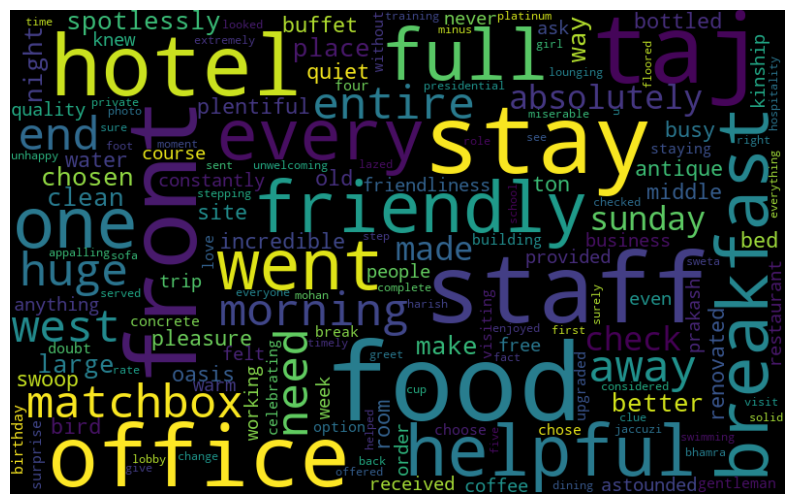

In [67]:
word_cloud(tw__sentiment_clu1_df[tw__sentiment_clu1_df["sentiment"]== "NEGATIVE"]["sentence"])

In [68]:
sentiment =sentiment_pipeline(taj_west_clustered_sentences[1])

In [69]:
tw__sentiment_clu2_df =add_sentiment(taj_west_clustered_sentences[1],sentiment)

In [70]:
tw__sentiment_clu2_df[tw__sentiment_clu2_df["sentiment"]== "NEGATIVE"]["sentence"]

43     morning breakfast westend never spread food at...
69     amazing experience yet seen polite battalion e...
81     would rate hotel average seems name taj blemis...
99     excellent well comfortable supportive good ave...
103    staying house jiva spa experience understated ...
109    one best place bengaluru one must stay least l...
112    great service amazing keep coming often one be...
146    best time service expect anything le taj herit...
Name: sentence, dtype: object

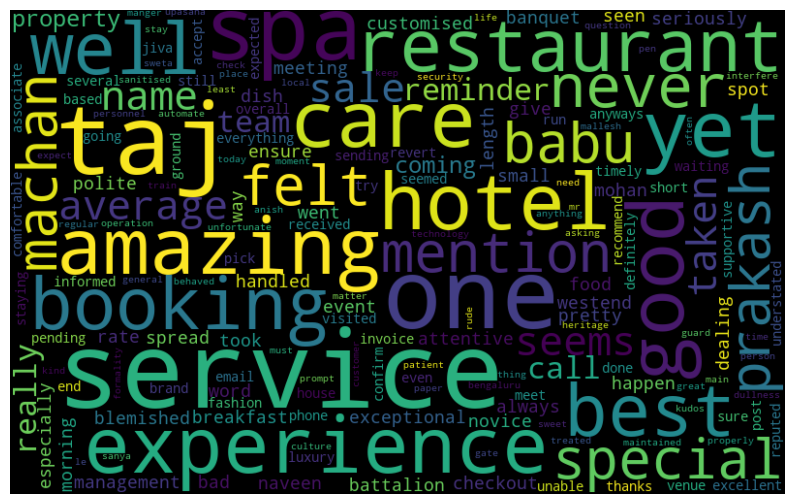

In [71]:
word_cloud(tw__sentiment_clu2_df[tw__sentiment_clu2_df["sentiment"]== "NEGATIVE"]["sentence"])

In [134]:
display(tw__sentiment_clu2_df[tw__sentiment_clu2_df["sentiment"]== "NEGATIVE"].to_string())

'                                                                                                                                                                                                                                                                                                                                                                                                                                           sentence sentiment  emotion\n43                                                                                                                                                                                                                                                                                                              morning breakfast westend never spread food attentive service always spot special mention prakash babu naveen machan took good care  NEGATIVE  neutral\n69                                                                                     

In [72]:
sentiment =sentiment_pipeline(leela_palace_clustered_sentences[0])

In [73]:
lp__sentiment_clu1_df =add_sentiment(leela_palace_clustered_sentences[0],sentiment)

In [74]:
lp__sentiment_clu1_df[lp__sentiment_clu1_df["sentiment"]== "NEGATIVE"]["sentence"]

57     imsong good gave good professional spa treatme...
63     nice perhaps could little south indian food ca...
82     three us stayed asking extra bed paid extra th...
139    went zen sunday dimsum food really live music ...
140    food worth definitely one time try service req...
156    nothing left us comment either service food qu...
Name: sentence, dtype: object

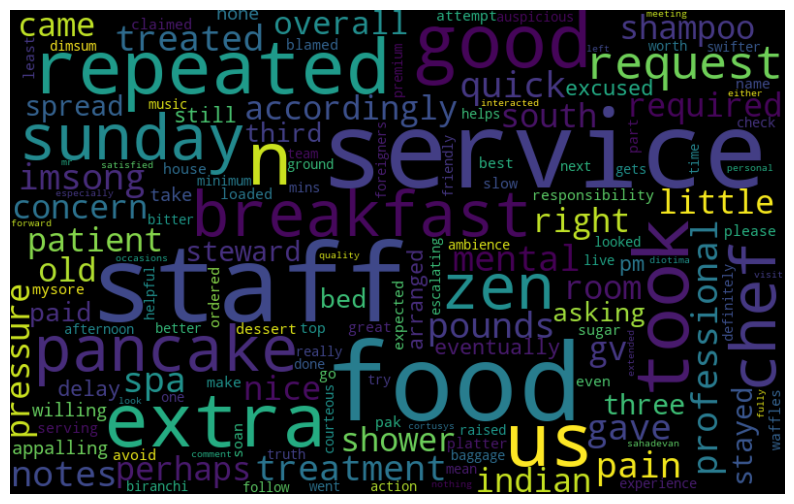

In [75]:
word_cloud(lp__sentiment_clu1_df[lp__sentiment_clu1_df["sentiment"]== "NEGATIVE"]["sentence"])

In [135]:
display(lp__sentiment_clu1_df[lp__sentiment_clu1_df["sentiment"]== "NEGATIVE"].to_string())

'                                                                                                                                                                                                                                                                                                                                                                                   sentence sentiment  emotion\n57                                                                                                                                                                                                              imsong good gave good professional spa treatment took quick mental notes pain pounds n treated accordingly patient n gv right pressure required concern shampoo shower room  NEGATIVE     fear\n63                                                                                                                                                                                                     

In [76]:
sentiment =sentiment_pipeline(leela_palace_clustered_sentences[1])

In [77]:
lp__sentiment_clu2_df =add_sentiment(leela_palace_clustered_sentences[1],sentiment)

In [136]:
display(lp__sentiment_clu2_df[lp__sentiment_clu2_df["sentiment"]== "NEGATIVE"].to_string())

'                                                                                                                                                                                                                                                                                                                                                                                                                      sentence sentiment   emotion\n51                                                                                                                                                                                                                                                                                    great great great come often never get rajat great japanese asian finger service fast manchow soup hunan pan fried top picks addit sushi  NEGATIVE       joy\n87                                                                                                             one lady friend 

In [78]:
lp__sentiment_clu2_df[lp__sentiment_clu2_df["sentiment"]== "NEGATIVE"]["sentence"]

51     great great great come often never get rajat g...
87     one lady friend shocked find man entering room...
89     visited leela hotel april business trip welcom...
108    stayed leela palace two nights end lengthy tri...
177    great great great come often never get rajat g...
Name: sentence, dtype: object

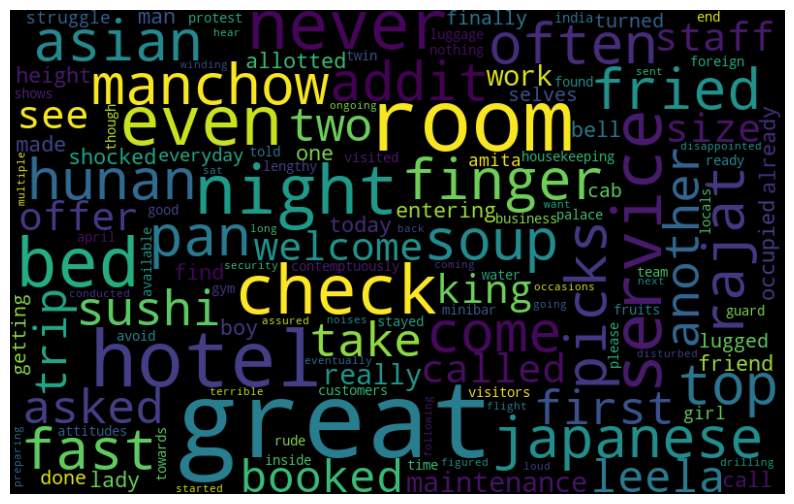

In [79]:
word_cloud(lp__sentiment_clu2_df[lp__sentiment_clu2_df["sentiment"]== "NEGATIVE"]["sentence"])

In [80]:
sentiment =sentiment_pipeline(grand_mercure_clustered_sentences[0])

In [81]:
gm_sentiment_clu1_df =add_sentiment(grand_mercure_clustered_sentences[0],sentiment)

In [82]:
gm_sentiment_clu1_df[gm_sentiment_clu1_df['sentiment']== 'NEGATIVE']['sentence']

10     stayed many accor properties properties chain ...
59     best two star hotel facilities staff goes chec...
102    staying room long time spent spending property...
119    taxi pick service convenient pick drop desired...
192    superb friendly staffs great one best cleaning...
Name: sentence, dtype: object

In [137]:
display(gm_sentiment_clu1_df[gm_sentiment_clu1_df["sentiment"]== "NEGATIVE"].to_string())

'                                                                                                                                                                                                                                                                                                                                                                                                                               sentence sentiment   emotion\n10   stayed many accor properties properties chain never felt personal touch hotel staffs used norm early past years hotel industry lost personal touch everything glad see old days personal touch enthuiasism staffs welcome right airport pickup checkout everything bitsy desk quickly checked upgraded suite loyal accor called check room rooms great chef ashok made sure visit every table breakfast enquire aboit guy bar made  NEGATIVE       joy\n59                 best two star hotel facilities staff goes check took mins despite telling hotel check time

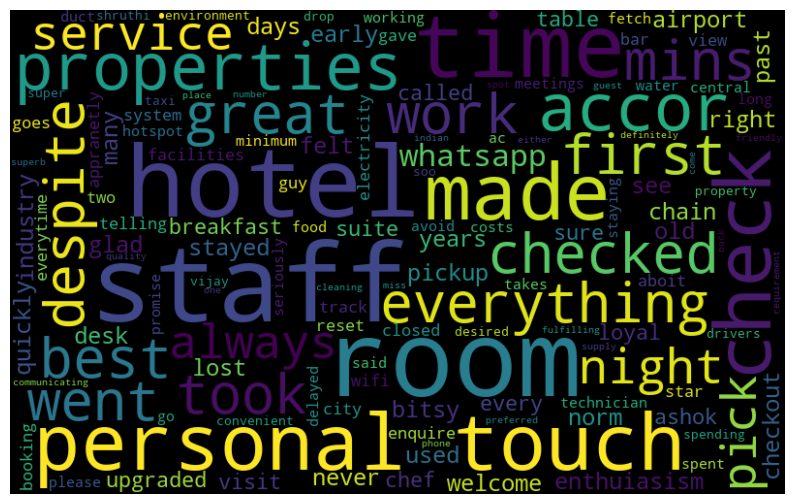

In [83]:
word_cloud(gm_sentiment_clu1_df[gm_sentiment_clu1_df['sentiment']== 'NEGATIVE']['sentence'])

In [84]:
sentiment =sentiment_pipeline(grand_mercure_clustered_sentences[1])

In [85]:
gm_sentiment_clu2_df =add_sentiment(grand_mercure_clustered_sentences[1],sentiment)

In [86]:
gm_sentiment_clu2_df[gm_sentiment_clu2_df['sentiment']== 'NEGATIVE']['sentence']

35     stay hospitality good food needs lot first for...
38     stayed hotel rooms staff reception especially ...
40     uncle deepak ad kind offered give free hot cho...
50     accomodation ameneties overall team food guest...
78     humble behaviour staff segments ready go beyon...
82     since hv come business would like personally s...
128    located outskirts closer business across road ...
130    people hotel always willing help assist anythi...
145    stayed hotel months peak staff made stay comfo...
Name: sentence, dtype: object

In [139]:
display(gm_sentiment_clu2_df[gm_sentiment_clu2_df["sentiment"]== "NEGATIVE"].to_string())

'                                                                                                                                                                                                                                                                                                                                                                                                                   sentence sentiment  emotion\n35                                                                                                                                                              stay hospitality good food needs lot first forced review receptionist checking food approach asking whether need asked something said check chef never came back response half hour came back asked whether need felt drowsed eating sweetish breakfast bit  NEGATIVE  sadness\n38                                                                                                                                     

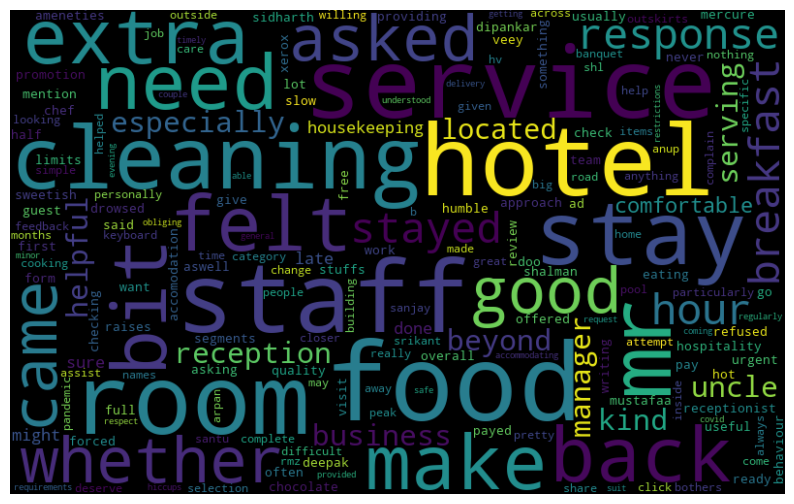

In [87]:
word_cloud(gm_sentiment_clu2_df[gm_sentiment_clu2_df['sentiment']== 'NEGATIVE']['sentence'])

In [88]:
tw__sentiment_clu1_df['sentence'][0]

'courteous treatment mohan thank place fantastic brunch ambience perfect laidback food spread ask order outside buffet well'

Emotion Analysis

In [89]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")



In [90]:
tw__sentiment_clu1_df['emotion'] = tw__sentiment_clu1_df['sentence'].apply(lambda x: classifier(x)[0]["label"])
tw__sentiment_clu2_df['emotion'] = tw__sentiment_clu2_df['sentence'].apply(lambda x: classifier(x)[0]["label"])
lp__sentiment_clu1_df['emotion'] = lp__sentiment_clu1_df['sentence'].apply(lambda x: classifier(x)[0]["label"])
lp__sentiment_clu2_df['emotion'] = lp__sentiment_clu2_df['sentence'].apply(lambda x: classifier(x)[0]["label"])
gm_sentiment_clu1_df['emotion']= gm_sentiment_clu1_df['sentence'].apply(lambda x: classifier(x)[0]["label"])
gm_sentiment_clu2_df['emotion']= gm_sentiment_clu2_df['sentence'].apply(lambda x: classifier(x)[0]["label"])

In [91]:
tw__sentiment_clu1_df

sentence sentiment emotion
0   courteous treatment mohan thank place fantasti...  POSITIVE     joy
1   enjoyed every stay location property ambiance ...  POSITIVE     joy
2   thanks giri mohan serving u delicious breakfas...  POSITIVE     joy
3   great evening iimb alumnus thank ayush wonderf...  POSITIVE     joy
4   amazing went celebrate birthday good job make ...  POSITIVE     joy
..                                                ...       ...     ...
74  manager shreya little trouble checkin helped u...  POSITIVE     joy
75  first visit post covid wife kid eve crew showc...  POSITIVE     joy
76  great came celebrate birthday sweet celebrate ...  POSITIVE     joy
77  enjoyed stay taj room property gorgeous staff ...  POSITIVE     joy
78  sitting charming surrounded enjoying fine buff...  POSITIVE     joy

[79 rows x 3 columns]

In [150]:
import matplotlib.pyplot as plt

def plot_emotion_frequency(df):
    plt.figure(figsize=(10, 6))
    df['emotion'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Emotion Frequency Plot for Grand Mercure cluster 2')
    plt.xlabel('Emotion')
    plt.ylabel('Frequency')
    plt.show()



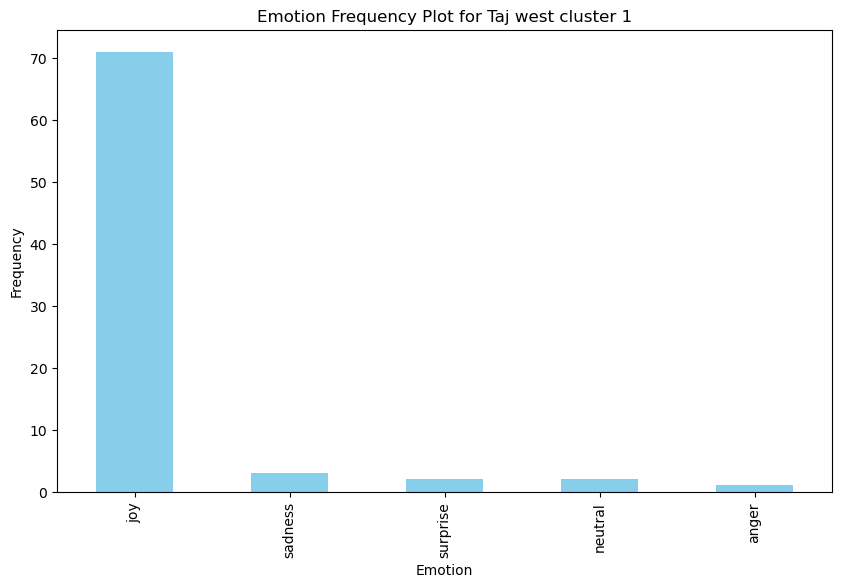

In [141]:
plot_emotion_frequency(tw__sentiment_clu1_df)

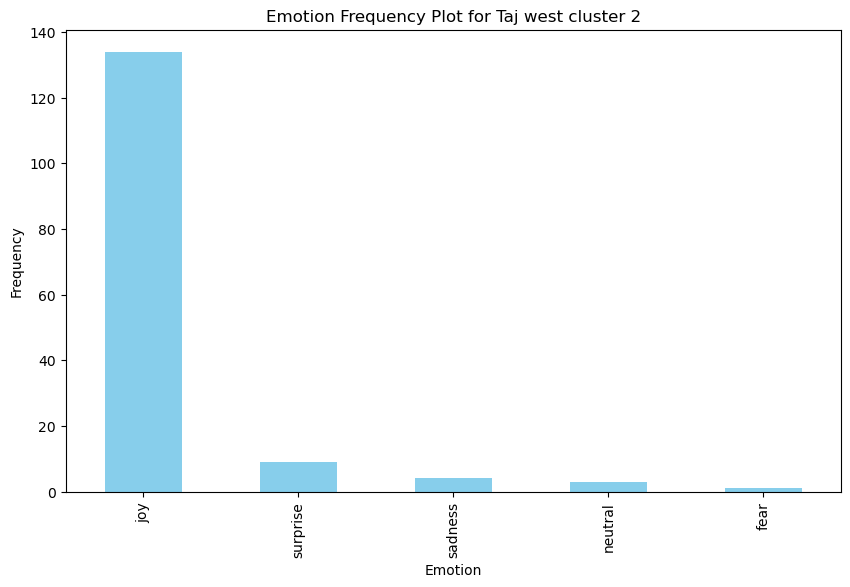

In [143]:
plot_emotion_frequency(tw__sentiment_clu2_df)

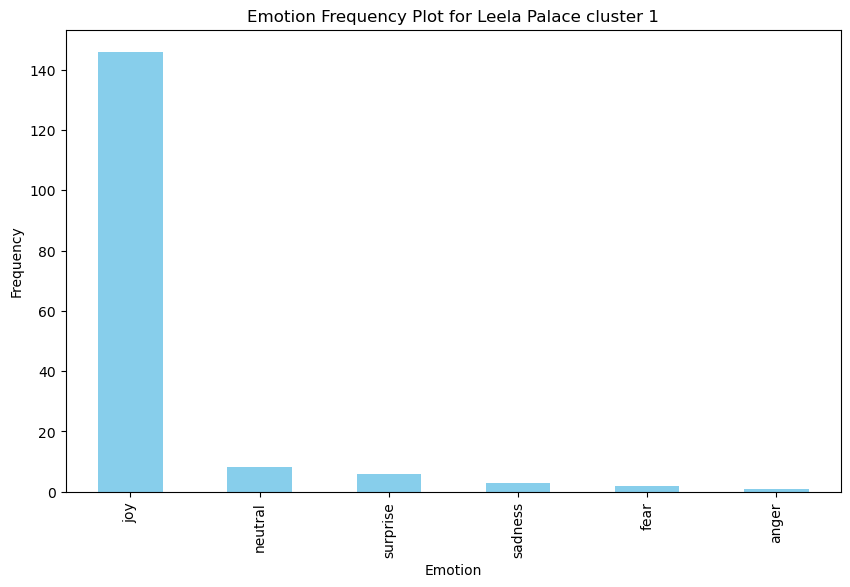

In [145]:
plot_emotion_frequency(lp__sentiment_clu1_df)

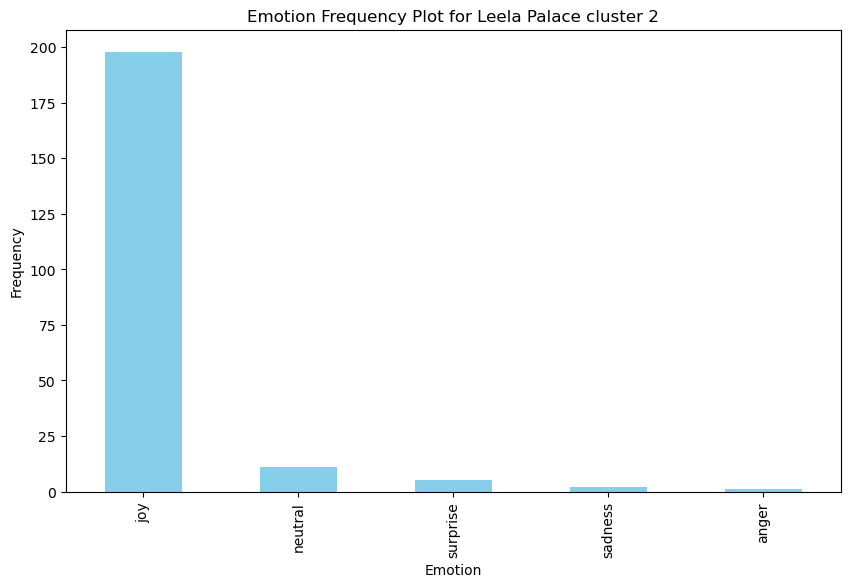

In [147]:
plot_emotion_frequency(lp__sentiment_clu2_df)

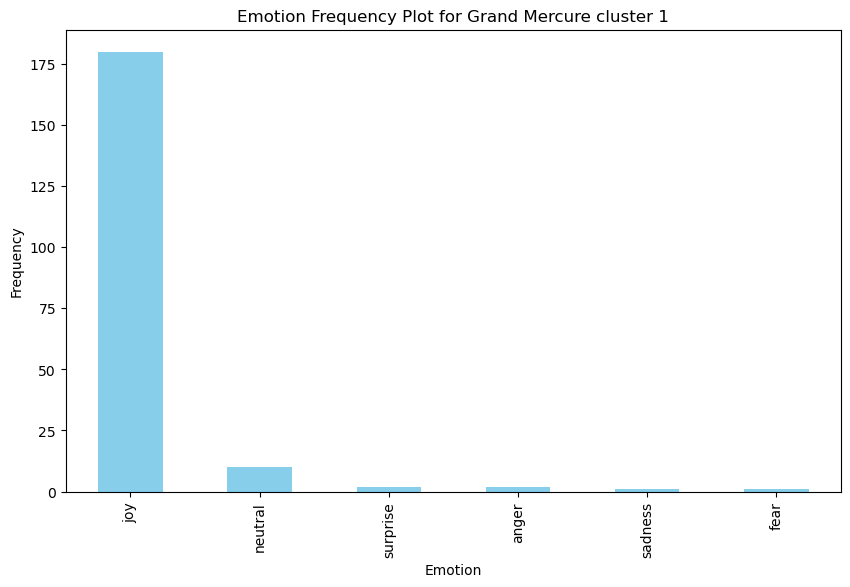

In [149]:
plot_emotion_frequency(gm_sentiment_clu1_df)

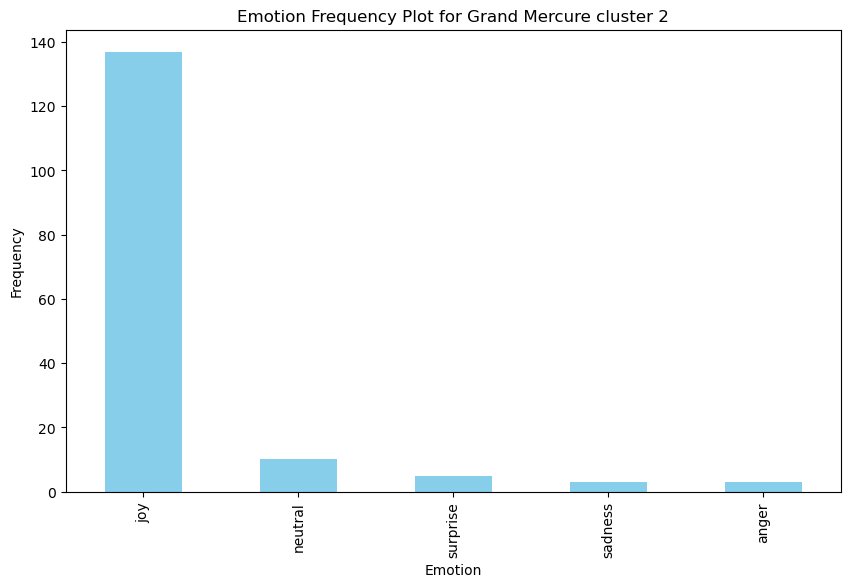

In [151]:
plot_emotion_frequency(gm_sentiment_clu2_df)

In [99]:
emotions_not_joy_neutral = tw__sentiment_clu1_df.loc[~tw__sentiment_clu1_df['emotion'].isin(['joy', 'neutral', 'surprise']), 'sentence']
print(emotions_not_joy_neutral.unique())

['warmth exuded neha vekatesh sweta dipanita ensured restaurant time stay kid loved much first find take table one best place bangalore short break staff solitude taj west end offer'
 'property well appointed kept beautiful state considering vintage nature disappointed following stayed hotel day breakfast menu identical repeated without change breakfast table cleared use requested specifically service etc sporadic timebound required reminder fruit served room cleaned dust settled'
 'front right moment lobby front office staff looked extremely unwelcoming absolutely appalling see unhappy miserable girl checked absolutely clue check greet platinum front office harish bhamra need training considered role fact entire front office staff time check sent back hospitality school stepping foot surely rate first would give solid minus five complete change offered cup'
 'right centre place feel like history harsh neha upasana took good care u thanks wonderful service']


In [100]:
emotions_not_joy_neutral = tw__sentiment_clu2_df.loc[~tw__sentiment_clu2_df['emotion'].isin(['joy', 'neutral','surprise']), 'sentence']
print(emotions_not_joy_neutral.unique())

['experience taj west end wonderful awe hospitality staff machan special mention prakash babu sarvana giving u best service breakfast also visited blue ginger ambience food top stay taj west end lovely would love come back'
 'would rate hotel average seems name taj blemished management also pretty bad especially sale banquet happen one small event meeting way handled taken care word felt dealing novice give reminder everything even several call yet done post meet still waiting pending invoice received yet sending reminder email sale team informed venue call sure really going anyways never expected reputed brand taj end thanks ground team restaurant'
 'staying house jiva spa experience understated luxury associate taj pick phone spa visited spa booking seems run like unable confirm booking revert timely fashion accept booking based personnel paper pen operation technology today automate'
 'one best place bengaluru one must stay least life well sanitised well maintained property regular 

In [101]:
emotions_not_joy_neutral = lp__sentiment_clu1_df.loc[~lp__sentiment_clu1_df['emotion'].isin(['joy', 'neutral', 'surprise']), 'sentence']
print(emotions_not_joy_neutral.unique())

['imsong good gave good professional spa treatment took quick mental notes pain pounds n treated accordingly patient n gv right pressure required concern shampoo shower room'
 'good average ok spread felt falling short price adarsh nice respond overall ok may return another'
 'dear would like express thanks gratitude team leela pleasure working wedding tamanna aditya prestigious despite hectic support coordination assistance us extremely thank support service care time without support possible us carry flawless best wishes geetanjali styling geetanjali'
 'three us stayed asking extra bed paid extra third since eventually arranged pm repeated delay still excused appalling none staff willing take responsibility blamed staff ordered dessert platter mysore pak claimed house great attempt make soan top breakfast name serving sugar loaded pancake best part even chef please go slow pancakes waffles avoid least expected experience'
 'food worth definitely one time try service request raised st

In [102]:
emotions_not_joy_neutral = lp__sentiment_clu2_df.loc[~lp__sentiment_clu2_df['emotion'].isin(['joy', 'neutral', 'surprise']), 'sentence']
print(emotions_not_joy_neutral.unique())

['reflexology treatment superb warm welcoming smile made day great food facilities nice rooms unfortunately fell outside building entrance however slacks'
 'stayed leela palace two nights end lengthy trip india disappointed first night sat room winding night started hear terrible loud drilling noises coming called check staff see going sent security eventually figured maintenance conducted room preparing really long flight back really want disturbed maintenance work next called asked staff check see would work ongoing following assured multiple occasions would'
 'stayed leela palace delhi loved luxurious maintain idea peace stay leela exact taken birthday party booking booked entire two restaurant leaving pan worse loud music playing full call several think hotels also respect resident booking paying advance run away suffer torture well beyond u early morning flight next staying leela bangalore garden promises middle city loud blaring street music place']


In [103]:
emotions_not_joy_neutral = gm_sentiment_clu1_df.loc[~gm_sentiment_clu1_df['emotion'].isin(['joy', 'neutral', 'surprise']), 'sentence']
print(emotions_not_joy_neutral.unique())

['best two star hotel facilities staff goes check took mins despite telling hotel check time appranetly system track gave closed room despite booking city view room wifi work reset everytime electricity went took meetings hotspot ac work first night technician said water went central duct working seriously room service takes minimum mins promise first night go fetch food delayed please avoid hotel costs'
 'rooms spacious quality service indrajith done fantastic job house keeping polite understands customers concern resolves issue'
 'worth staying good service staff grand mercure harsh laxmi staff well behaved helpful every ways need definitely gonna recommend grand loved'
 'stayed around days grand mercure banglore near gopal mall service would specially like take glaring names like prashant excellent completely took care apart names like nishant divya shruthi serving us attending overall amazing experience']


In [104]:
emotions_not_joy_neutral = gm_sentiment_clu2_df.loc[~gm_sentiment_clu2_df['emotion'].isin(['joy', 'neutral', 'surprise']), 'sentence']
print(emotions_not_joy_neutral.unique())

['stay hospitality good food needs lot first forced review receptionist checking food approach asking whether need asked something said check chef never came back response half hour came back asked whether need felt drowsed eating sweetish breakfast bit'
 'accomodation ameneties overall team food guest service bit slow response work quality veey'
 'experience food good quality processes like check check easy staff including mamatha harsh would recommend place anyone'
 'overall service hotel terrific great courtiousness staff harsh team would definitely come back hotel hotel offers rooms spacious library lounge lvl something go'
 'good view room food super staff harsh reception good close mall places'
 'stayed nights nov though went front office took min checkin top allocated room number horribly located mtr away lift phase though category room available near upset ready stay allocated room ready cancel room booking post sunita duty manger pretended check inventory different later got n

                    Text Analysis using Topic Modeling

In [105]:
import re, pandas as pd, numpy as np
from pprint import pprint
import gensim
#alternately you may use textacy library, instead of gensim, for topic modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)

In [106]:
def get_parameters(data):
    data_ready = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data]
    id2word = corpora.Dictionary(data_ready)
    corpus = [id2word.doc2bow(text) for text in data_ready]
    texts = [[id2word[word_id] for word_id, freq in doc] for doc in corpus]
    return  corpus, id2word, texts

def calculate_coherence_score(n, alpha, beta,corpus,id2word, tokeize_article):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    
    perplexity = lda_model.log_perplexity(corpus)
    c_umass = CoherenceModel(model=lda_model, texts=tokeize_article, corpus=corpus, dictionary=id2word, coherence='u_mass')
    c_uci = CoherenceModel(model=lda_model, texts=tokeize_article, corpus=corpus, dictionary=id2word, coherence='c_uci')
    coherence_umass_lda = c_umass.get_coherence()
    coherence_uci_lda = c_uci.get_coherence()
    return perplexity,coherence_umass_lda,coherence_uci_lda

#list containing various hyperparameters
no_of_topics = [2,5,7,10,12,14]
alpha_list = ['symmetric',0.3,0.5,0.7]
beta_list = ['auto',0.3,0.5,0.7]
corpus, id2word, texts =get_parameters(taj_west_df["Cleaned_Review"].to_list())
tw_topicmodel_tune_df = pd.DataFrame(columns=['alpha', 'beta', 'topics','c_umass','c_uci','perplexity'])
for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            perplexity,coherence_umass_lda,coherence_uci_lda= calculate_coherence_score(n, alpha, beta,corpus, id2word, texts)
            new_row = {'topics':n,'alpha': alpha, 'beta': beta, 'c_umass': coherence_umass_lda,'c_uci':coherence_uci_lda,'perplexity':perplexity}
            tw_topicmodel_tune_df = pd.concat([tw_topicmodel_tune_df, pd.DataFrame([new_row])], ignore_index=True)


In [107]:
def min_max_normalize(column):
    min_value = column.min()
    max_value = column.max()
    normalized_column = (column - min_value) / (max_value - min_value)
    return normalized_column

# Apply mean and std normalization followed by min-max normalization to the specified columns
tw_topicmodel_tune_df['c_umass_normalized'] = min_max_normalize(tw_topicmodel_tune_df['c_umass'])
tw_topicmodel_tune_df['c_uci_normalized'] = min_max_normalize(tw_topicmodel_tune_df['c_uci'])
tw_topicmodel_tune_df['perplexity_normalized'] = min_max_normalize(tw_topicmodel_tune_df['perplexity'])


In [108]:
tw_topicmodel_tune_df

alpha  beta topics    c_umass      c_uci  perplexity  \
0   symmetric  auto      2  -2.311606  -0.618294   -6.593821   
1   symmetric   0.3      2  -2.595929  -1.020738   -6.754567   
2   symmetric   0.5      2  -2.311606  -0.618294   -6.714224   
3   symmetric   0.7      2  -2.602691  -0.908922   -6.701809   
4         0.3  auto      2  -2.537551  -0.797525   -6.566558   
..        ...   ...    ...        ...        ...         ...   
91        0.5   0.7     14 -10.232803  -7.815509   -7.191223   
92        0.7  auto     14  -9.709242  -8.208055   -8.324093   
93        0.7   0.3     14  -7.683736  -6.725277   -7.348550   
94        0.7   0.5     14 -10.445269  -7.680454   -7.305930   
95        0.7   0.7     14 -15.422477 -10.455772   -7.265460   

    c_umass_normalized  c_uci_normalized  perplexity_normalized  
0             0.993812          0.975262               0.984488  
1             0.972261          0.935365               0.893027  
2             0.993812          0.975262               0.915981  
3             0.971748          0.946450               0.923045  
4             0.976686          0.957494               1.000000  
..                 ...               ...                    ...  
91            0.393381          0.261749               0.644579  
92            0.433067          0.222833               0.000000  
93            0.586602          0.369832               0.555063  
94            0.377276          0.275138               0.579313  
95            0.000000          0.000000               0.602340  

[96 rows x 9 columns]

In [109]:
tw_topicmodel_tune_df.loc[tw_topicmodel_tune_df['perplexity'].idxmin()]


alpha                         0.7
beta                         auto
topics                         14
c_umass                 -9.709242
c_uci                   -8.208055
perplexity              -8.324093
c_umass_normalized       0.433067
c_uci_normalized         0.222833
perplexity_normalized         0.0
Name: 92, dtype: object

In [110]:
tw_topicmodel_tune_df.loc[tw_topicmodel_tune_df['c_uci_normalized'].idxmax()]


alpha                         0.3
beta                          0.3
topics                          2
c_umass                 -2.229977
c_uci                   -0.368766
perplexity              -6.751814
c_umass_normalized            1.0
c_uci_normalized              1.0
perplexity_normalized    0.894593
Name: 5, dtype: object

In [111]:
tw_topicmodel_tune_df.loc[tw_topicmodel_tune_df['c_umass_normalized'].idxmax()]

alpha                         0.3
beta                          0.3
topics                          2
c_umass                 -2.229977
c_uci                   -0.368766
perplexity              -6.751814
c_umass_normalized            1.0
c_uci_normalized              1.0
perplexity_normalized    0.894593
Name: 5, dtype: object

In [112]:
def runLDA(data, NUM_TOPICS, ALPHA, ETA):
    data_ready = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data]
    id2word = corpora.Dictionary(data_ready)
    corpus = [id2word.doc2bow(text) for text in data_ready]
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word,num_topics=NUM_TOPICS, random_state=100,update_every=1,chunksize=100,
                                               passes=10,alpha=ALPHA,eta=ETA, iterations=100,per_word_topics=True)
    texts = [[id2word[word_id] for word_id, freq in doc] for doc in corpus]
    return lda_model, corpus, id2word, texts

def get_topic_words_concise(lda_model):
    for topic_id in range(lda_model.num_topics):
        topk = lda_model.show_topic(topic_id, 10)
        print('{}: {}'.format(topic_id, ' '.join([w for w, _ in topk])))

import warnings
warnings.filterwarnings("ignore")

In [113]:

lda_model, corpus, id2word, texts = runLDA(taj_west_df["Cleaned_Review"].to_list(), 14, 0.7, 'auto')

print("vocabulary size ", len(id2word.values()))
print("alpha, eta ", lda_model.alpha, lda_model.eta)

print("Topic word distribution ")
pprint(lda_model.print_topics())

docTopicDistribution = lda_model.get_document_topics(corpus)
TOPIC_NUM = 1
lda_model.show_topic(TOPIC_NUM)

get_topic_words_concise(lda_model)

vocabulary size  1322
alpha, eta  [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] [0.07763823 0.07530821 0.07572212 ... 0.07031956 0.07031956 0.07031956]
Topic word distribution 
[(0,
  '0.077*"prakash" + 0.049*"babu" + 0.041*"room" + 0.037*"courteous" + '
  '0.028*"stay" + 0.027*"sanya" + 0.026*"amazing" + 0.024*"extremely" + '
  '0.023*"green" + 0.020*"come"'),
 (1,
  '0.039*"mention" + 0.035*"front" + 0.027*"kind" + 0.024*"wonderful" + '
  '0.023*"desk" + 0.023*"heritage" + 0.021*"experience" + 0.020*"chef" + '
  '0.018*"year" + 0.016*"personal"'),
 (2,
  '0.071*"good" + 0.063*"service" + 0.042*"food" + 0.039*"breakfast" + '
  '0.035*"back" + 0.034*"venkatesh" + 0.028*"mohan" + 0.025*"thank" + '
  '0.024*"amazing" + 0.023*"restaurant"'),
 (3,
  '0.052*"everyone" + 0.052*"city" + 0.026*"hustle" + 0.021*"surendra" + '
  '0.021*"preparation" + 0.021*"nestled" + 0.021*"khumbh" + 0.021*"gucchi" + '
  '0.021*"delicate" + 0.021*"corner"'),
 (4,
  '0.094*"place" + 0.080*"ambience"

In [114]:
get_topic_words_concise(lda_model)

0: prakash babu room courteous stay sanya amazing extremely green come
1: mention front kind wonderful desk heritage experience chef year personal
2: good service food breakfast back venkatesh mohan thank amazing restaurant
3: everyone city hustle surendra preparation nestled khumbh gucchi delicate corner
4: place ambience mohan must visit taj bangalore west food end
5: property well nice spread room check shreya even maintained taj
6: taj west end made stay thank birthday forward much thanks
7: staff visit special excellent lovely saravanan super every family cake
8: really beautiful food shreya helped awesome amazing level dessert little
9: great service care sweta took time special sunday best taken
10: thanks enjoyed room food staff special happy sweta lot helpful
11: stay excellent one recommend definitely experience hotel best dish kudos
12: friendly visiting staff jancy cordial insider good food harsh class
13: friend work getaway add please player flute calming great feeling


In [115]:
#log likelihood or perplexity based measure
perplexity = lda_model.log_perplexity(corpus)
print("perplexity:", perplexity)

#coherence based measures
c_umass = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=id2word, coherence='u_mass')
c_uci = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=id2word, coherence='c_uci')
print("coherence: umass:", c_umass.get_coherence())
print("coherence: uci:", c_uci.get_coherence())

perplexity: -8.323123960458187
coherence: umass: -9.711079846548214
coherence: uci: -8.30797123512764


In [ ]:
!pip install --quiet pyLDAvis

In [116]:
import pyLDAvis.gensim
ldavis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
display(pyLDAvis.display(ldavis))

In [117]:
corpus, id2word, texts =get_parameters(leela_palace_df["Cleaned_Review"].to_list())
lp_topicmodel_tune_df = pd.DataFrame(columns=['alpha', 'beta', 'topics','c_umass','c_uci','perplexity'])
for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            perplexity,coherence_umass_lda,coherence_uci_lda= calculate_coherence_score(n, alpha, beta,corpus, id2word, texts)
            new_row = {'topics':n,'alpha': alpha, 'beta': beta, 'c_umass': coherence_umass_lda,'c_uci':coherence_uci_lda,'perplexity':perplexity}
            lp_topicmodel_tune_df = pd.concat([lp_topicmodel_tune_df, pd.DataFrame([new_row])], ignore_index=True)


In [118]:
lp_topicmodel_tune_df['c_umass_normalized'] = min_max_normalize(lp_topicmodel_tune_df['c_umass'])
lp_topicmodel_tune_df['c_uci_normalized'] = min_max_normalize(lp_topicmodel_tune_df['c_uci'])
lp_topicmodel_tune_df['perplexity_normalized'] = min_max_normalize(lp_topicmodel_tune_df['perplexity'])

In [119]:
lp_topicmodel_tune_df.loc[lp_topicmodel_tune_df['perplexity'].idxmin()]


alpha                         0.7
beta                         auto
topics                         14
c_umass                 -8.235405
c_uci                   -6.818947
perplexity              -9.144666
c_umass_normalized        0.44095
c_uci_normalized         0.351537
perplexity_normalized         0.0
Name: 92, dtype: object

In [120]:
lp_topicmodel_tune_df.loc[lp_topicmodel_tune_df['c_uci_normalized'].idxmax()]


alpha                         0.3
beta                         auto
topics                          2
c_umass                 -2.001343
c_uci                   -0.366131
perplexity              -6.764536
c_umass_normalized            1.0
c_uci_normalized              1.0
perplexity_normalized         1.0
Name: 4, dtype: object

In [121]:
lp_topicmodel_tune_df.loc[lp_topicmodel_tune_df['c_umass_normalized'].idxmax()]


alpha                         0.3
beta                         auto
topics                          2
c_umass                 -2.001343
c_uci                   -0.366131
perplexity              -6.764536
c_umass_normalized            1.0
c_uci_normalized              1.0
perplexity_normalized         1.0
Name: 4, dtype: object

In [122]:
NUM_TOPICS=14
ALPHA, ETA = 0.7, 'auto'
#ALPHA, ETA = 3, 3
lda_model, corpus, id2word, texts = runLDA(leela_palace_df["Cleaned_Review"].to_list(), NUM_TOPICS, ALPHA, ETA)

print("vocabulary size ", len(id2word.values()))
print("alpha, eta ", lda_model.alpha, lda_model.eta)

print("Topic word distribution ")
pprint(lda_model.print_topics())

docTopicDistribution = lda_model.get_document_topics(corpus)
TOPIC_NUM = 1
lda_model.show_topic(TOPIC_NUM)

get_topic_words_concise(lda_model)

vocabulary size  1981
alpha, eta  [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] [0.06971247 0.08082024 0.07015426 ... 0.0653518  0.06526703 0.06526703]
Topic word distribution 
[(0,
  '0.112*"recommend" + 0.060*"highly" + 0.058*"definitely" + 0.034*"visit" + '
  '0.031*"one" + 0.027*"best" + 0.025*"menu" + 0.022*"massage" + 0.022*"spa" + '
  '0.022*"experience"'),
 (1,
  '0.097*"amazing" + 0.084*"really" + 0.057*"good" + 0.055*"helpful" + '
  '0.055*"vishal" + 0.055*"service" + 0.045*"breakfast" + 0.041*"courteous" + '
  '0.022*"kind" + 0.020*"services"'),
 (2,
  '0.105*"food" + 0.063*"excellent" + 0.048*"service" + 0.045*"good" + '
  '0.040*"spread" + 0.033*"ambience" + 0.025*"forward" + 0.023*"buffet" + '
  '0.022*"even" + 0.022*"place"'),
 (3,
  '0.052*"mr" + 0.037*"friendly" + 0.033*"great" + 0.027*"lunch" + '
  '0.024*"vaibhav" + 0.022*"made" + 0.020*"love" + 0.020*"attention" + '
  '0.018*"special" + 0.017*"provided"'),
 (4,
  '0.042*"great" + 0.035*"service" + 0.033*

In [123]:
get_topic_words_concise(lda_model)

0: recommend highly definitely visit one best menu massage spa experience
1: amazing really good helpful vishal service breakfast courteous kind services
2: food excellent service good spread ambience forward buffet even place
3: mr friendly great lunch vaibhav made love attention special provided
4: great service food family place come zen thanks went ambience
5: staff loved absolutely variety perfect worth wide lovely booking dined
6: food dining jamavar ambience comfortable us great everything served sujit
7: us nice sure well feel made good always come quite
8: food thank service ambiance attentive try restaurant cake helped quality
9: leela special palace time citrus wonderful great care took experience
10: hotel beautiful stay staff entire best really us one birthday
11: delicious came enjoyed main course bar lot service biranchi ms
12: every take thanks sitting new property mile sunil know seating
13: great must overall good fantastic experience make lovely ask dishes


In [124]:
#log likelihood or perplexity based measure
perplexity = lda_model.log_perplexity(corpus)
print("perplexity:", perplexity)

#coherence based measures
c_umass = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=id2word, coherence='u_mass')
c_uci = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=id2word, coherence='c_uci')
print("coherence: umass:", c_umass.get_coherence())
print("coherence: uci:", c_uci.get_coherence())

perplexity: -9.136774264499483
coherence: umass: -7.955403247858301
coherence: uci: -6.5906055937932795


In [125]:
import pyLDAvis.gensim
ldavis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
display(pyLDAvis.display(ldavis))

In [ ]:
corpus, id2word, texts =get_parameters(grand_mercure_df["Cleaned_Review"].to_list())
gm_topicmodel_tune_df = pd.DataFrame(columns=['alpha', 'beta', 'topics','c_umass','c_uci','perplexity'])
for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            perplexity,coherence_umass_lda,coherence_uci_lda= calculate_coherence_score(n, alpha, beta,corpus, id2word, texts)
            new_row = {'topics':n,'alpha': alpha, 'beta': beta, 'c_umass': coherence_umass_lda,'c_uci':coherence_uci_lda,'perplexity':perplexity}
            gm_topicmodel_tune_df = pd.concat([gm_topicmodel_tune_df, pd.DataFrame([new_row])], ignore_index=True)
gm_topicmodel_tune_df['c_umass_normalized'] = min_max_normalize(gm_topicmodel_tune_df['c_umass'])
gm_topicmodel_tune_df['c_uci_normalized'] = min_max_normalize(gm_topicmodel_tune_df['c_uci'])
gm_topicmodel_tune_df['perplexity_normalized'] = min_max_normalize(gm_topicmodel_tune_df['perplexity'])

In [ ]:
gm_topicmodel_tune_df.loc[gm_topicmodel_tune_df['perplexity'].idxmin()]


alpha                         0.7
beta                         auto
topics                         14
c_umass                 -7.633089
c_uci                    -7.09554
perplexity              -8.071739
c_umass_normalized       0.372596
c_uci_normalized         0.260308
perplexity_normalized         0.0
Name: 92, dtype: object

In [ ]:
gm_topicmodel_tune_df.loc[gm_topicmodel_tune_df['c_umass_normalized'].idxmax()]


alpha                         0.3
beta                          0.3
topics                          2
c_umass                 -2.038332
c_uci                   -0.368038
perplexity              -6.550074
c_umass_normalized            1.0
c_uci_normalized         0.983571
perplexity_normalized    0.912685
Name: 5, dtype: object

In [ ]:
gm_topicmodel_tune_df.loc[gm_topicmodel_tune_df['c_umass_normalized'].idxmax()]


alpha                         0.3
beta                          0.3
topics                          2
c_umass                 -2.038332
c_uci                   -0.368038
perplexity              -6.550074
c_umass_normalized            1.0
c_uci_normalized         0.983571
perplexity_normalized    0.912685
Name: 5, dtype: object

In [ ]:
NUM_TOPICS=14
ALPHA, ETA = 0.7, 'auto'
#ALPHA, ETA = 3, 3
lda_model, corpus, id2word, texts = runLDA(grand_mercure_df["Cleaned_Review"].to_list(), NUM_TOPICS, ALPHA, ETA)

print("vocabulary size ", len(id2word.values()))
print("alpha, eta ", lda_model.alpha, lda_model.eta)

print("Topic word distribution ")
pprint(lda_model.print_topics())

docTopicDistribution = lda_model.get_document_topics(corpus)
TOPIC_NUM = 1
lda_model.show_topic(TOPIC_NUM)

get_topic_words_concise(lda_model)

vocabulary size  1551
alpha, eta  [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] [0.10482095 0.08936667 0.07461774 ... 0.06447692 0.06737928 0.06737928]
Topic word distribution 
[(0,
  '0.092*"food" + 0.067*"thanks" + 0.061*"us" + 0.058*"special" + '
  '0.039*"great" + 0.036*"mr" + 0.025*"amazing" + 0.025*"took" + 0.025*"care" '
  '+ 0.022*"check"'),
 (1,
  '0.083*"best" + 0.049*"great" + 0.047*"hotel" + 0.035*"property" + '
  '0.035*"stay" + 0.033*"guest" + 0.031*"one" + 0.024*"enjoy" + 0.022*"warmth" '
  '+ 0.019*"care"'),
 (2,
  '0.133*"clean" + 0.098*"cleaning" + 0.064*"nice" + 0.055*"area" + '
  '0.041*"visiting" + 0.034*"neat" + 0.021*"massage" + 0.020*"cleanliness" + '
  '0.019*"well" + 0.011*"beside"'),
 (3,
  '0.121*"front" + 0.069*"hospitality" + 0.064*"office" + 0.035*"visit" + '
  '0.030*"desk" + 0.029*"laxmi" + 0.029*"looking" + 0.029*"helpful" + '
  '0.028*"helped" + 0.020*"always"'),
 (4,
  '0.047*"great" + 0.042*"really" + 0.039*"stay" + 0.031*"reception" + '

In [ ]:
get_topic_words_concise(lda_model)

0: food thanks us special great mr amazing took care check
1: best great hotel property stay guest one enjoy warmth care
2: clean cleaning nice area visiting neat massage cleanliness well beside
3: front hospitality office visit desk laxmi looking helpful helped always
4: great really stay reception experience come staffs staff back business
5: hotel everything family day checkout never conduct right welcome humble
6: good services friendly nice see located service hope big ready
7: restaurant take care go next gave even hotel bengaluru full
8: excellent staff hotel stay food great service room breakfast made
9: grand mercure well stay mall helpful gopalan recommend reception hotel
10: specially wonderful check siddharth first guys felt came served smiling
11: team service really time experience food thank housekeeping great visit
12: room stay every thanks maintained keeping comfortable house darshan days
13: staff comfortable pool got view service manager must extremely enjoyed


In [ ]:
#log likelihood or perplexity based measure
perplexity = lda_model.log_perplexity(corpus)
print("perplexity:", perplexity)

#coherence based measures
c_umass = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=id2word, coherence='u_mass')
c_uci = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=id2word, coherence='c_uci')
print("coherence: umass:", c_umass.get_coherence())
print("coherence: uci:", c_uci.get_coherence())

perplexity: -8.067641469964919
coherence: umass: -7.900350703329715
coherence: uci: -7.274809894301406


In [ ]:
import pyLDAvis.gensim
ldavis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
display(pyLDAvis.display(ldavis))